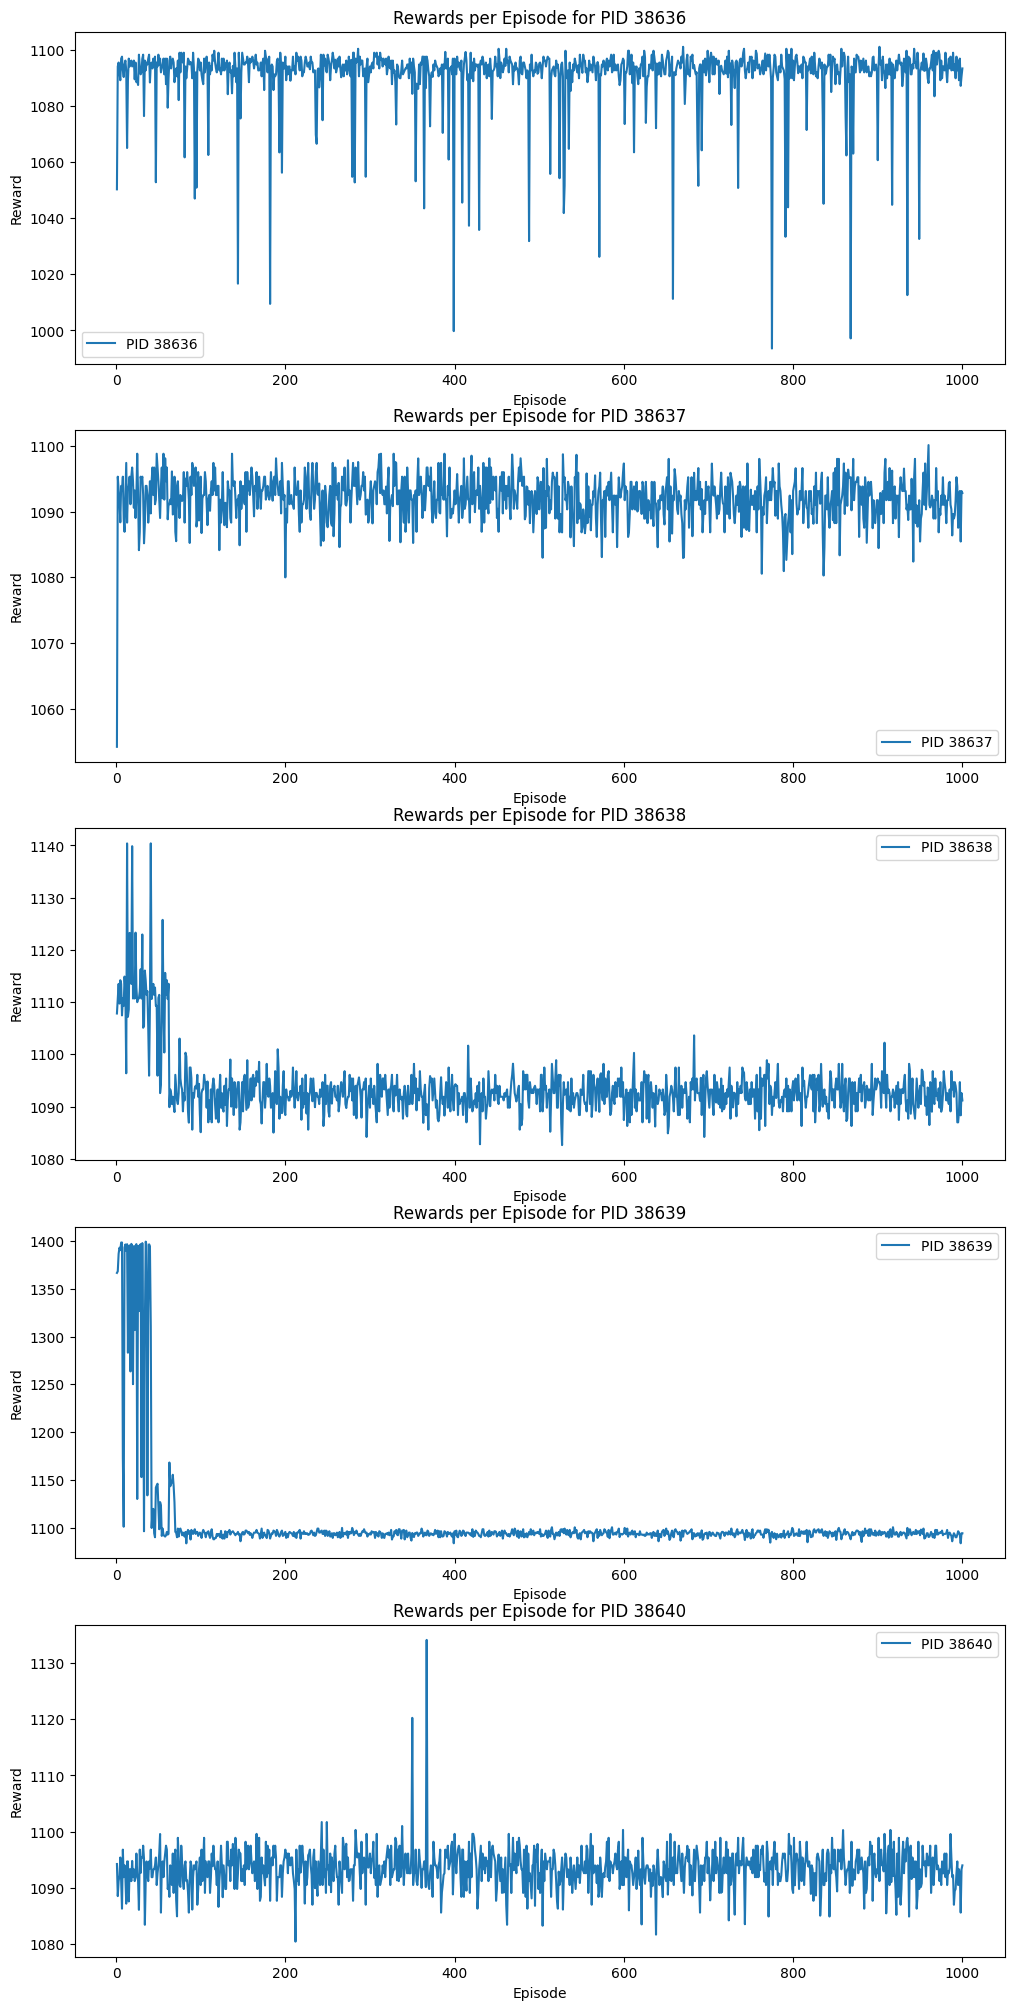

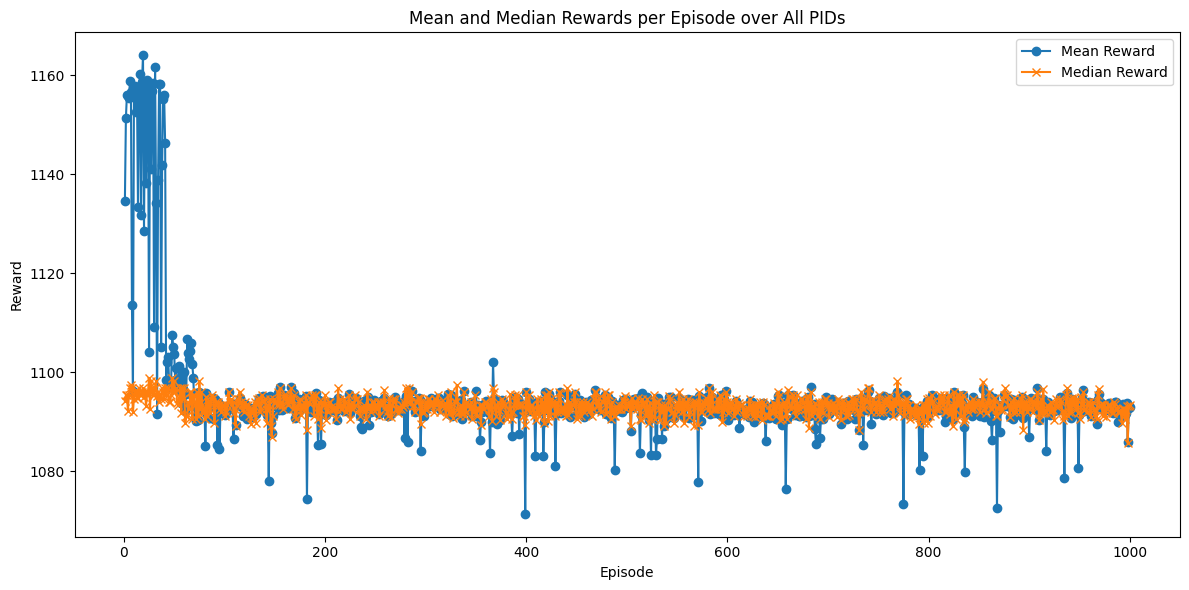

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_rewards(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Group by PID and calculate mean rewards for each PID
    grouped_by_pid = df.groupby(['PID', 'Episode'])['Reward'].mean().reset_index()
    
    # Group by Episode and calculate mean and median rewards over all PIDs
    grouped_by_episode = df.groupby('Episode')['Reward'].agg(['mean', 'median']).reset_index()
    
    # Plot the results
    num_pids = grouped_by_pid['PID'].nunique()
    fig, axes = plt.subplots(nrows=num_pids, ncols=1, figsize=(12, 5 * num_pids))
    
    if num_pids == 1:
        axes = [axes]
    
    for i, pid in enumerate(grouped_by_pid['PID'].unique()):
        pid_data = grouped_by_pid[grouped_by_pid['PID'] == pid]
        
        axes[i].plot(pid_data['Episode'], pid_data['Reward'], label=f'PID {pid}')
        
        axes[i].set_title(f'Rewards per Episode for PID {pid}')
        axes[i].set_xlabel('Episode')
        axes[i].set_ylabel('Reward')
        axes[i].legend()
    
    # Plot mean and median rewards over all PIDs in a separate figure
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(grouped_by_episode['Episode'], grouped_by_episode['mean'], label='Mean Reward', marker='o')
    ax.plot(grouped_by_episode['Episode'], grouped_by_episode['median'], label='Median Reward', marker='x')
    
    ax.set_title('Mean and Median Rewards per Episode over All PIDs')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    analyze_rewards('episode_rewards.csv')